In [ ]:
import pandas as pd
import plotly.express as px

file_path = '../data/raw/voitures_par_commune_cleaned.csv'
df = pd.read_csv(file_path)

print(df.columns)
print(df.head(3))

Index(['code_commune', 'nom_commune', 'id_unique_commune', 'departement',
       'region', 'date_recensement', 'nb_voit_elec', 'nb_voit_total'],
      dtype='object')
  code_commune           nom_commune           id_unique_commune departement  \
0        34045             cabrières             CABRIÈRES_34045     Hérault   
1        34046  cambon-et-salvergues  CAMBON-ET-SALVERGUES_34046     Hérault   
2        34046  cambon-et-salvergues  CAMBON-ET-SALVERGUES_34046     Hérault   

      region date_recensement  nb_voit_elec  nb_voit_total  
0  Occitanie       2024-03-31            10            647  
1  Occitanie       2022-09-30             0             63  
2  Occitanie       2025-03-31             0             73  


/tmp/ipykernel_16556/2060795543.py:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Pour les cartes (optionnel)
import geopandas as gpd
import folium
from folium.plugins import HeatMap

/tmp/ipykernel_16556/1551199430.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, parse_dates=['date_recensement'])


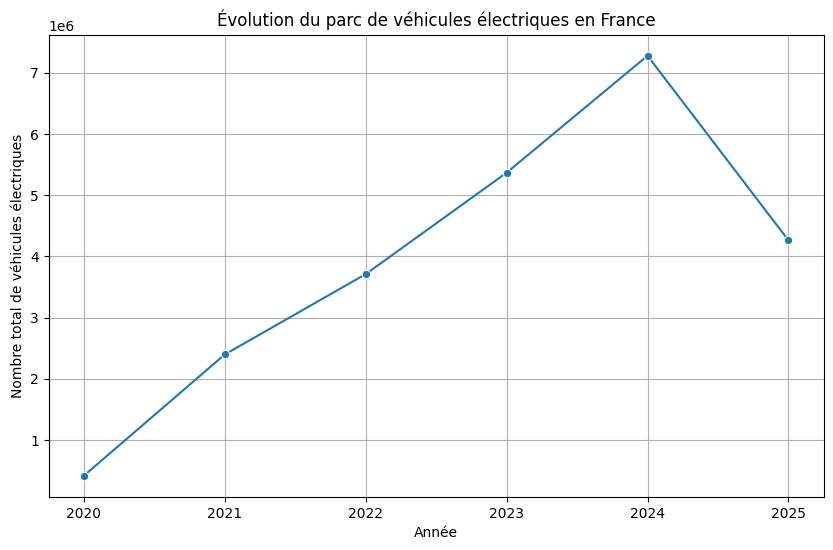

In [7]:
df = pd.read_csv(file_path, parse_dates=['date_recensement'])


# Agrégation par date (mois ou année)
df['annee'] = df['date_recensement'].dt.year

parc_ve = df.groupby('annee')['nb_voit_elec'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=parc_ve, x='annee', y='nb_voit_elec', marker='o')
plt.title('Évolution du parc de véhicules électriques en France')
plt.ylabel('Nombre total de véhicules électriques')
plt.xlabel('Année')
plt.grid(True)
plt.show()


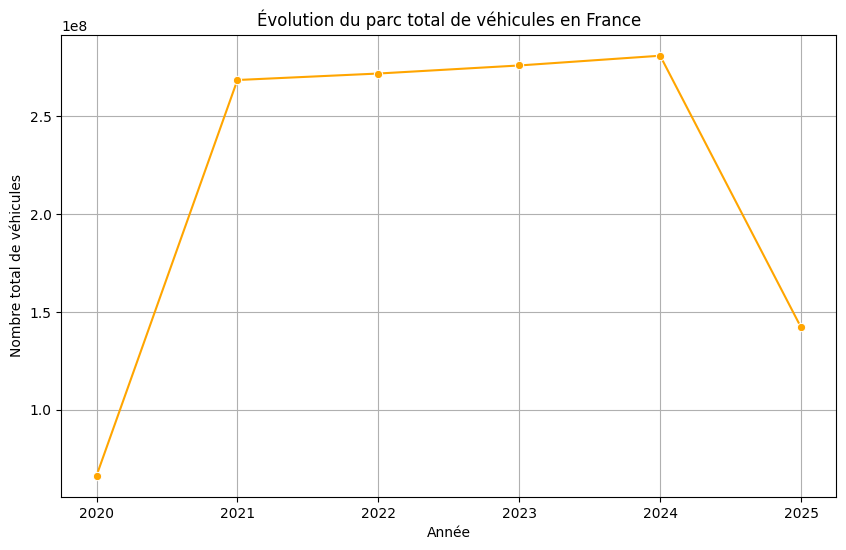

In [8]:
parc_total = df.groupby('annee')['nb_voit_total'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=parc_total, x='annee', y='nb_voit_total', marker='o', color='orange')
plt.title('Évolution du parc total de véhicules en France')
plt.ylabel('Nombre total de véhicules')
plt.xlabel('Année')
plt.grid(True)
plt.show()


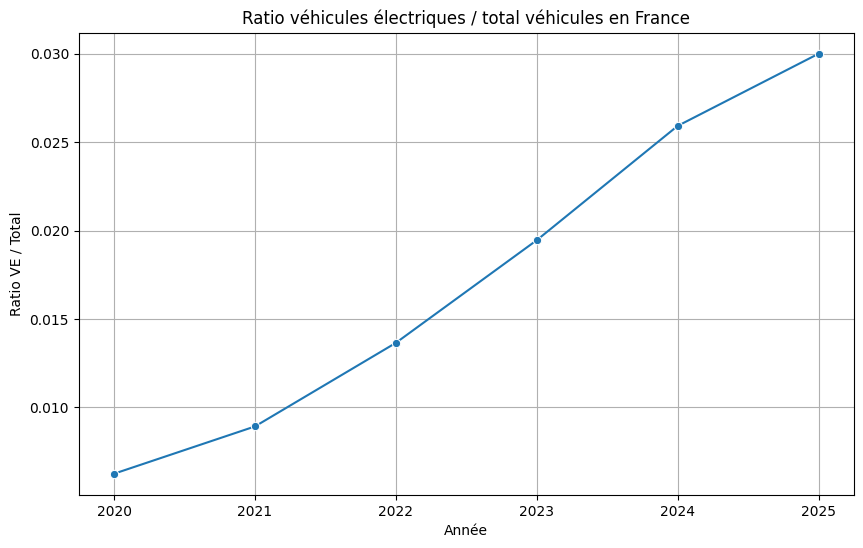

In [9]:
parc = df.groupby('annee').agg({'nb_voit_elec':'sum', 'nb_voit_total':'sum'}).reset_index()
parc['ratio_ve'] = parc['nb_voit_elec'] / parc['nb_voit_total']

plt.figure(figsize=(10,6))
sns.lineplot(data=parc, x='annee', y='ratio_ve', marker='o')
plt.title('Ratio véhicules électriques / total véhicules en France')
plt.ylabel('Ratio VE / Total')
plt.xlabel('Année')
plt.grid(True)
plt.show()


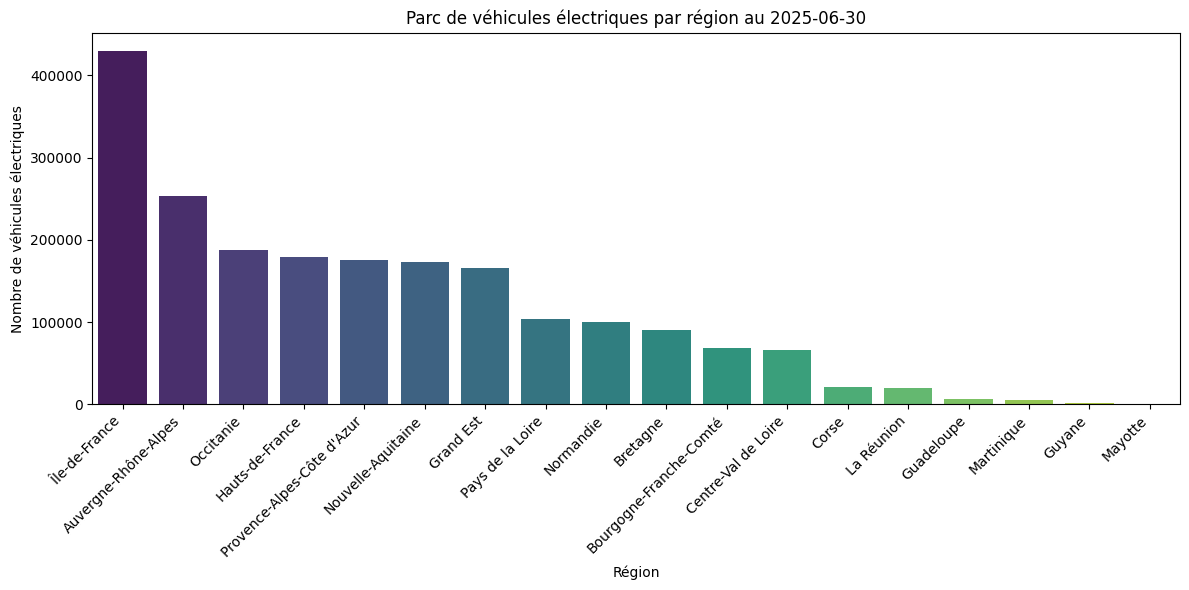

In [10]:
# Dernière date disponible
last_date = df['date_recensement'].max()
df_last = df[df['date_recensement'] == last_date]

parc_region = df_last.groupby('region')['nb_voit_elec'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=parc_region.sort_values('nb_voit_elec', ascending=False),
            x='region', y='nb_voit_elec', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title(f'Parc de véhicules électriques par région au {last_date.date()}')
plt.ylabel('Nombre de véhicules électriques')
plt.xlabel('Région')
plt.tight_layout()
plt.show()


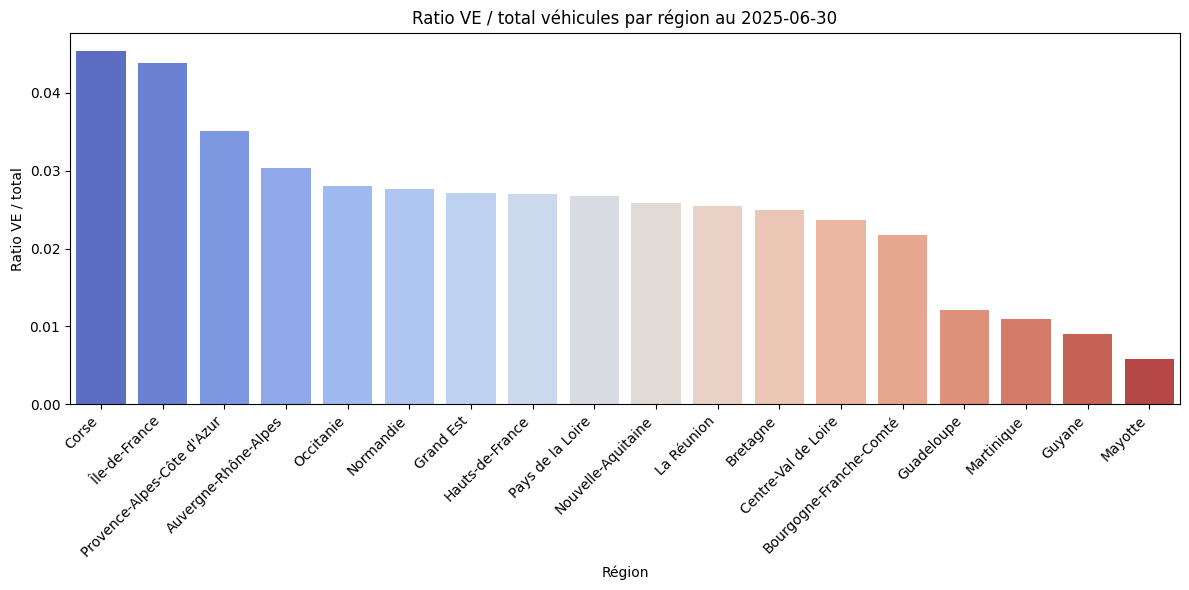

In [11]:
df_last_region = df_last.groupby('region').agg({'nb_voit_elec':'sum', 'nb_voit_total':'sum'}).reset_index()
df_last_region['ratio_ve'] = df_last_region['nb_voit_elec'] / df_last_region['nb_voit_total']

plt.figure(figsize=(12,6))
sns.barplot(data=df_last_region.sort_values('ratio_ve', ascending=False),
            x='region', y='ratio_ve', palette='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.title(f'Ratio VE / total véhicules par région au {last_date.date()}')
plt.ylabel('Ratio VE / total')
plt.xlabel('Région')
plt.tight_layout()
plt.show()


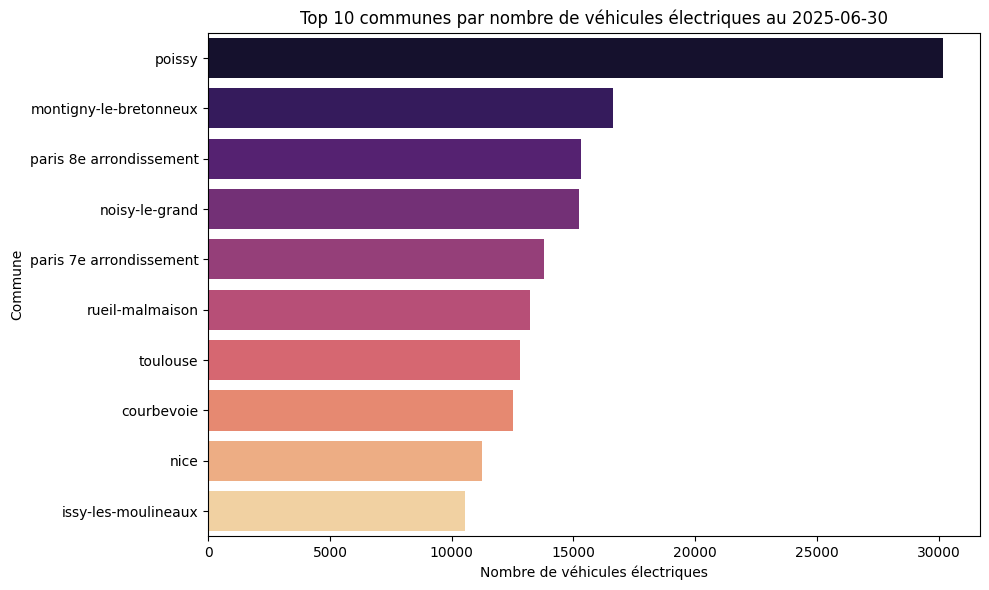

In [13]:
top_communes = df_last.groupby('nom_commune')['nb_voit_elec'].sum().reset_index()
top_communes = top_communes.sort_values('nb_voit_elec', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_communes, y='nom_commune', x='nb_voit_elec', palette='magma')
plt.title(f'Top 10 communes par nombre de véhicules électriques au {last_date.date()}')
plt.xlabel('Nombre de véhicules électriques')
plt.ylabel('Commune')
plt.tight_layout()
plt.show()
